In [1]:
pip install scikit-learn


Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install keras

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install pandas


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


2024-07-04 03:27:42.556935: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/user/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 10s 1us/step
Shape of train_images: (60000, 28, 28)
Shape of train_labels: (60000,)
Shape of test_images: (10000, 28, 28)
Shape of test_labels: (10000,)


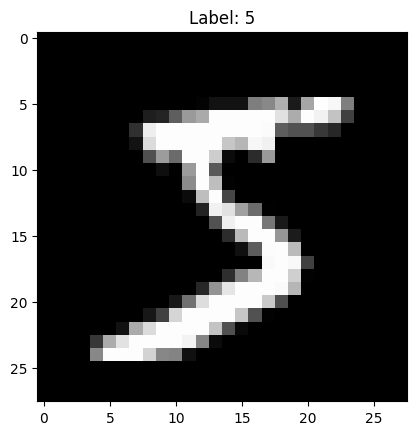

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

# Memuat dataset MNIST
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Menampilkan beberapa baris pertama dari dataset
print("Shape of train_images:", train_images.shape)
print("Shape of train_labels:", train_labels.shape)
print("Shape of test_images:", test_images.shape)
print("Shape of test_labels:", test_labels.shape)

# Menampilkan gambar pertama dari dataset
plt.imshow(train_images[0], cmap='gray')
plt.title(f"Label: {train_labels[0]}")
plt.show()


Shape of train_images: (60000, 28, 28)
Shape of train_labels: (60000,)
Shape of test_images: (10000, 28, 28)
Shape of test_labels: (10000,)


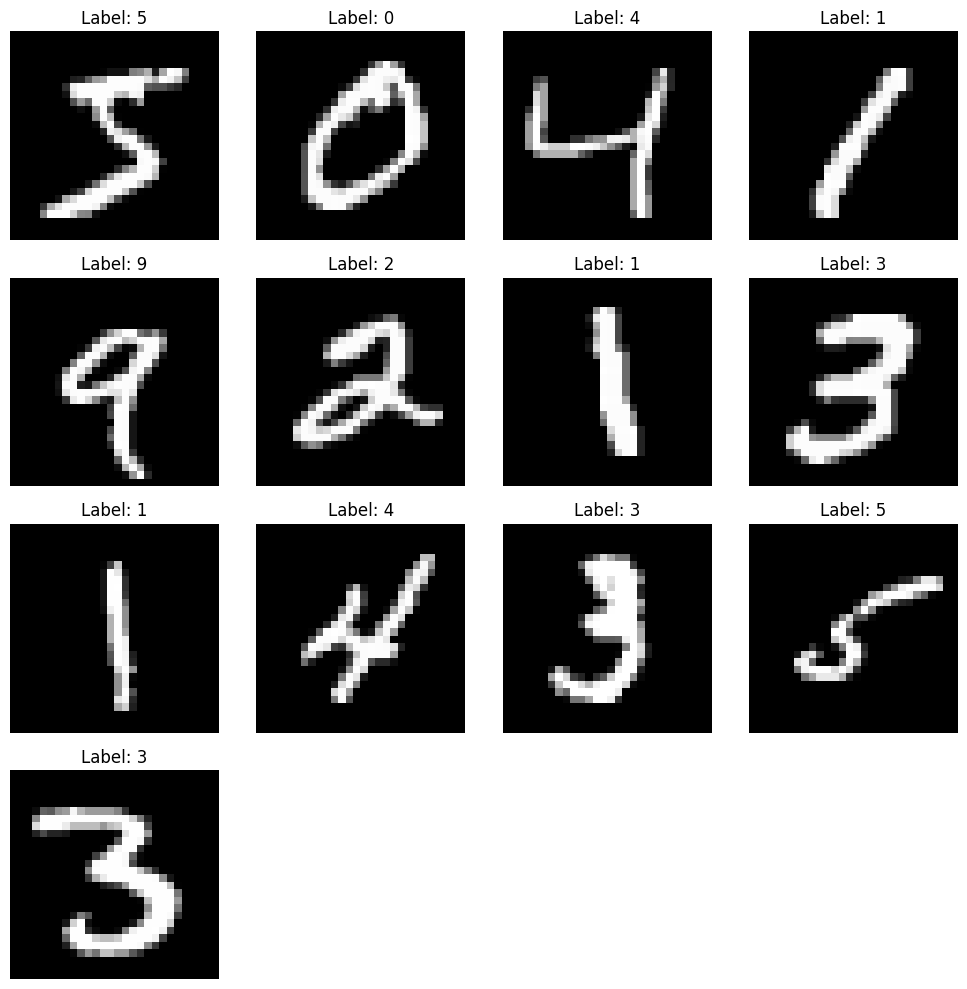

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

# Memuat dataset MNIST
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Menampilkan beberapa baris pertama dari dataset
print("Shape of train_images:", train_images.shape)
print("Shape of train_labels:", train_labels.shape)
print("Shape of test_images:", test_images.shape)
print("Shape of test_labels:", test_labels.shape)

# Menampilkan 13 gambar pertama dari dataset
plt.figure(figsize=(10, 10))
for i in range(13):
    plt.subplot(4, 4, i + 1)
    plt.imshow(train_images[i], cmap='gray')
    plt.title(f"Label: {train_labels[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


Shape of train_images: (60000, 28, 28)
Shape of train_labels: (60000, 10)
Shape of test_images: (10000, 28, 28)
Shape of test_labels: (10000, 10)


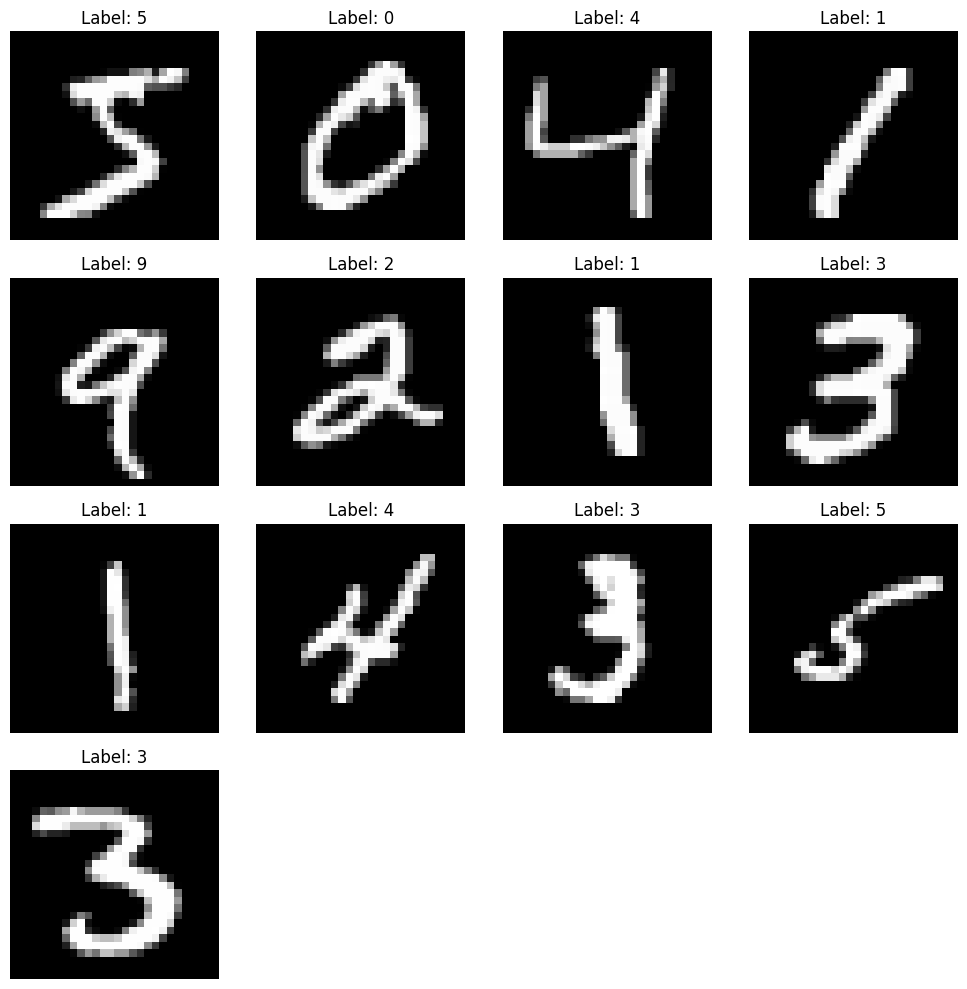

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.utils import to_categorical

# Memuat dataset MNIST
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalisasi data: mengubah nilai piksel dari 0-255 menjadi 0-1
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# Mengubah label menjadi one-hot encoding
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Menampilkan beberapa baris pertama dari dataset
print("Shape of train_images:", train_images.shape)
print("Shape of train_labels:", train_labels.shape)
print("Shape of test_images:", test_images.shape)
print("Shape of test_labels:", test_labels.shape)

# Menampilkan 13 gambar pertama dari dataset
plt.figure(figsize=(10, 10))
for i in range(13):
    plt.subplot(4, 4, i + 1)
    plt.imshow(train_images[i], cmap='gray')
    plt.title(f"Label: {np.argmax(train_labels[i])}")
    plt.axis('off')
plt.tight_layout()
plt.show()


In [8]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.optimizers import Adam
from keras.losses import categorical_crossentropy
from keras.datasets import mnist
from keras.utils import to_categorical

# Memuat dataset MNIST
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalisasi data
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# Mengubah label menjadi one-hot encoding
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Meratakan gambar 28x28 menjadi vektor 784-dimensi
train_images = train_images.reshape((-1, 28 * 28))
test_images = test_images.reshape((-1, 28 * 28))

# Membangun model NN
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

# Mengompilasi model
model.compile(optimizer=Adam(), loss=categorical_crossentropy, metrics=['accuracy'])

# Menampilkan ringkasan model
model.summary()

# Melatih model
history = model.fit(train_images, train_labels, epochs=20, batch_size=128, validation_data=(test_images, test_labels))

# Mengevaluasi model pada data uji
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')


/Users/user/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 567,434 (2.16 MB)

 Trainable params: 567,434 (2.16 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step - accuracy: 0.8322 - loss: 0.5381 - val_accuracy: 0.9681 - val_loss: 0.1055
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - accuracy: 0.9617 - loss: 0.1270 - val_accuracy: 0.9670 - val_loss: 0.1038
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - accuracy: 0.9709 - loss: 0.0915 - val_accuracy: 0.9725 - val_loss: 0.0851
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.9790 - loss: 0.0692 - val_accuracy: 0.9789 - val_loss: 0.0662
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.9812 - loss: 0.0590 - val_accuracy: 0.9811 - val_loss: 0.0641
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9840 - loss: 0.0503 - val_accuracy: 0.9829 - val_loss: 0.0584
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.9878 - loss: 0.0382 - val_accuracy: 0.9800 - val_loss: 0.0681
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.9872 - loss: 0.0401 - val_a

In [9]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.losses import categorical_crossentropy
from keras.datasets import mnist
from keras.utils import to_categorical

# Memuat dataset MNIST
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalisasi data
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# Mengubah label menjadi one-hot encoding
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Meratakan gambar 28x28 menjadi vektor 784-dimensi
train_images = train_images.reshape((-1, 28 * 28))
test_images = test_images.reshape((-1, 28 * 28))

# Membangun model NN
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

# Mengompilasi model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss=categorical_crossentropy, metrics=['accuracy'])

# Menampilkan ringkasan model
model.summary()

# Melatih model
history = model.fit(train_images, train_labels, epochs=30, batch_size=128, validation_data=(test_images, test_labels))

# Mengevaluasi model pada data uji
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 567,434 (2.16 MB)

 Trainable params: 567,434 (2.16 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.8326 - loss: 0.5356 - val_accuracy: 0.9650 - val_loss: 0.1103
Epoch 2/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9624 - loss: 0.1268 - val_accuracy: 0.9698 - val_loss: 0.0894
Epoch 3/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9732 - loss: 0.0874 - val_accuracy: 0.9779 - val_loss: 0.0699
Epoch 4/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9774 - loss: 0.0692 - val_accuracy: 0.9773 - val_loss: 0.0785
Epoch 5/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9811 - loss: 0.0597 - val_accuracy: 0.9754 - val_loss: 0.0802
Epoch 6/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9856 - loss: 0.0475 - val_accuracy: 0.9760 - val_loss: 0.0823
Epoch 7/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9864 - loss: 0.0428 - val_accuracy: 0.9801 - val_loss: 0.0692
Epoch 8/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9884 - loss: 0.0358 - val_accu

/Users/user/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.8269 - loss: 0.5561 - val_accuracy: 0.9628 - val_loss: 0.1230
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9606 - loss: 0.1272 - val_accuracy: 0.9751 - val_loss: 0.0833
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9746 - loss: 0.0845 - val_accuracy: 0.9779 - val_loss: 0.0746
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9799 - loss: 0.0664 - val_accuracy: 0.9795 - val_loss: 0.0664
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9830 - loss: 0.0548 - val_accuracy: 0.9777 - val_loss: 0.0729
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9852 - loss: 0.0456 - val_accuracy: 0.9808 - val_loss: 0.0646
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9871 - loss: 0.0408 - val_accuracy: 0.9820 - val_loss: 0.0599
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9896 - loss: 0.0348 - val_accu

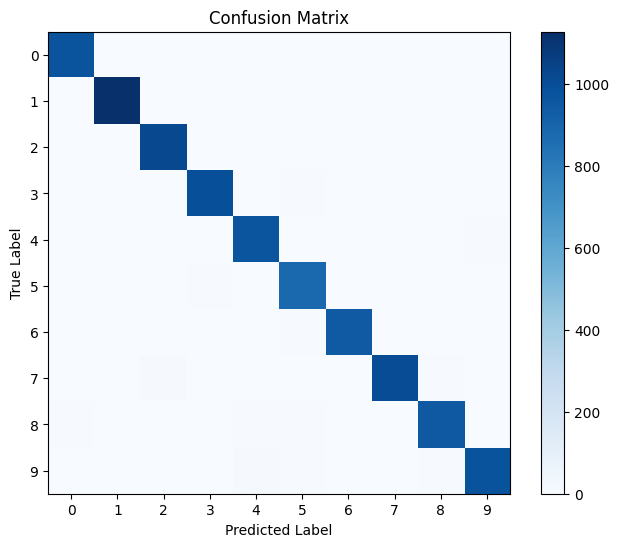

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.98      0.99      0.98      1032
           3       0.99      0.99      0.99      1010
           4       0.98      0.98      0.98       982
           5       0.97      0.99      0.98       892
           6       0.99      0.98      0.99       958
           7       0.99      0.98      0.98      1028
           8       0.98      0.97      0.98       974
           9       0.98      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [10]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.losses import categorical_crossentropy
from keras.datasets import mnist
from keras.utils import to_categorical
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, classification_report

# Memuat dataset MNIST
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalisasi data
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# Mengubah label menjadi one-hot encoding
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Meratakan gambar 28x28 menjadi vektor 784-dimensi
train_images = train_images.reshape((-1, 28 * 28))
test_images = test_images.reshape((-1, 28 * 28))

# Membangun model NN
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

# Mengompilasi model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss=categorical_crossentropy, metrics=['accuracy'])

# Melatih model
model.fit(train_images, train_labels, epochs=20, batch_size=128, validation_data=(test_images, test_labels))

# Memprediksi probabilitas kelas data uji
y_pred_prob = model.predict(test_images)
# Mengambil kelas dengan nilai probabilitas tertinggi
y_pred = np.argmax(y_pred_prob, axis=1)

# Menghitung akurasi
accuracy = accuracy_score(np.argmax(test_labels, axis=1), y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Menghitung presisi
precision = precision_score(np.argmax(test_labels, axis=1), y_pred, average='weighted')
print(f'Precision: {precision:.4f}')

# Menampilkan confusion matrix
cm = confusion_matrix(np.argmax(test_labels, axis=1), y_pred)
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, range(10))
plt.yticks(tick_marks, range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Menampilkan classification report
print('Classification Report:')
print(classification_report(np.argmax(test_labels, axis=1), y_pred, target_names=[str(i) for i in range(10)]))


/Users/user/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.8263 - loss: 0.5575 - val_accuracy: 0.9638 - val_loss: 0.1147
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9602 - loss: 0.1309 - val_accuracy: 0.9722 - val_loss: 0.0887
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.9731 - loss: 0.0855 - val_accuracy: 0.9771 - val_loss: 0.0747
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 0.9777 - loss: 0.0693 - val_accuracy: 0.9794 - val_loss: 0.0700
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9826 - loss: 0.0562 - val_accuracy: 0.9813 - val_loss: 0.0627
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9851 - loss: 0.0475 - val_accuracy: 0.9765 - val_loss: 0.0814
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9859 - loss: 0.0445 - val_accuracy: 0.9806 - val_loss: 0.0684
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9880 - loss: 0.0370 - val_acc

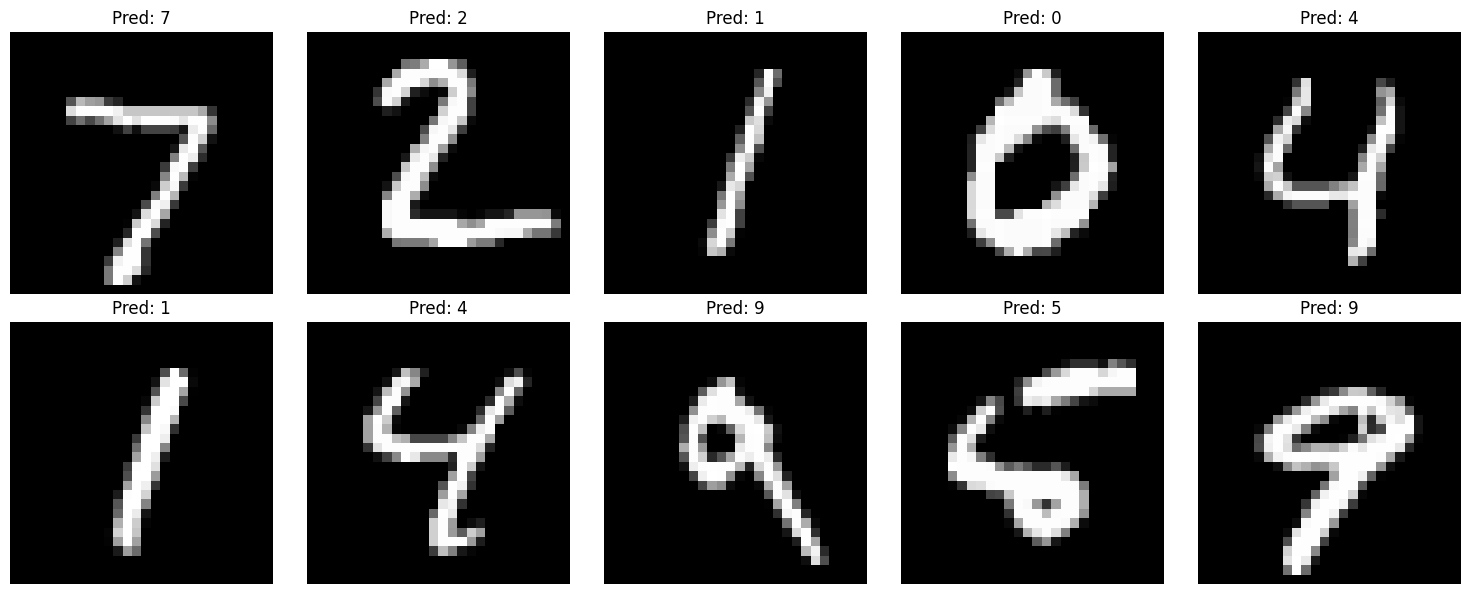

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.losses import categorical_crossentropy
from keras.datasets import mnist
from keras.utils import to_categorical
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, classification_report

# Memuat dataset MNIST
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalisasi data
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# Mengubah label menjadi one-hot encoding
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Meratakan gambar 28x28 menjadi vektor 784-dimensi
train_images = train_images.reshape((-1, 28 * 28))
test_images = test_images.reshape((-1, 28 * 28))

# Membangun model NN
model = Sequential()
model.add(Dense(512, activation='relu', input_dim=784))  # Menggunakan input_dim di lapisan pertama
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

# Mengompilasi model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss=categorical_crossentropy, metrics=['accuracy'])

# Melatih model
model.fit(train_images, train_labels, epochs=20, batch_size=128, validation_data=(test_images, test_labels))

# Memprediksi probabilitas kelas data uji
y_pred_prob = model.predict(test_images)
# Mengambil kelas dengan nilai probabilitas tertinggi
y_pred = np.argmax(y_pred_prob, axis=1)

# Visualisasi beberapa gambar dan hasil prediksi
num_images = 10
plt.figure(figsize=(15, 6))
for i in range(num_images):
    plt.subplot(2, num_images // 2, i + 1)
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
    plt.title(f'Pred: {y_pred[i]}')
    plt.axis('off')
plt.tight_layout()
plt.show()
